# Ex 1.- Guassian-distributed random value

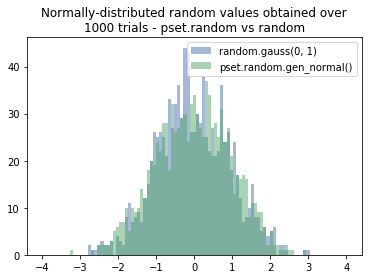

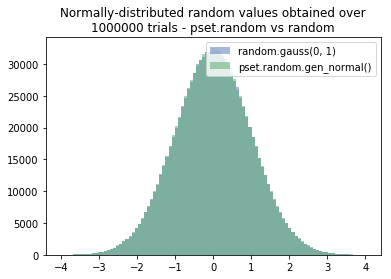

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

from textwrap import wrap
import numpy as np
import random

from pset.random import gen_normal


# Plot results over a set of trials
def test_normal(trials, filename):
    P = [gen_normal() for _ in range(trials)]
    Q = [random.gauss(0, 1) for _ in range(trials)]
    bins = np.linspace(-4, 4, 100)
    plt.figure('Test normal')
    title = '\n'.join(wrap(
        'Normally-distributed random values obtained over {} trials - pset.random vs random'.format(trials),
        50
    ))
    plt.title(title)
    plt.hist(P, bins, alpha=0.5, label='random.gauss(0, 1)')
    plt.hist(Q, bins, alpha=0.5, label='pset.random.gen_normal()')
    plt.legend(loc='upper right')
    plt.savefig('./assets/{}'.format(filename), dpi=400)
    plt.show()

test_normal(10 ** 3, 'ex1-results1.png')
test_normal(10 ** 6, 'ex1-results2.png')

# Ex 2.- (1+1)-ES

In [66]:
import numpy as np

from pset.algorithms import ES1P1
from pset.individuals import Sphere


def run_es1p1_sphere(d, max_trials, precision, fifth_rule_enabled=False):
    parent = Sphere([-99 for _ in range(d)])
    sim = ES1P1(
        max_trials=max_trials,
        precision=precision,
        parent=parent,
        fifth_rule_enabled=fifth_rule_enabled
    )
    print("Starting simulation with d={} (fifth rule {})".format(
        d,
        'enabled' if fifth_rule_enabled else 'disabled')
    ) 
    sim.run()
    
    print("Objective reached")
    print("\tGenerations:", sim.generations)
    print("\tSuccessful mutations:", sum(sim.successful_mutations))
    print("\tChromosome mean:", np.mean(sim.parent.chromosome))
    print("\tFitness:", sim.parent.fitness)


precision = 0.001
max_trials = 10**6
run_es1p1_sphere(10, max_trials=max_trials, precision=precision)
run_es1p1_sphere(100, max_trials=max_trials, precision=precision)

run_es1p1_sphere(10, max_trials=max_trials, precision=precision, fifth_rule_enabled=True)
run_es1p1_sphere(100, max_trials=max_trials, precision=precision, fifth_rule_enabled=True)

Starting simulation with d=10 (fifth rule disabled)
Objective reached
	Generations: 1000000
	Successful mutations: 399
	Chromosome mean: 0.07401128590534715
	Fitness: 0.2449303583829366
Starting simulation with d=100 (fifth rule disabled)
Objective reached
	Generations: 1000000
	Successful mutations: 1378
	Chromosome mean: -0.012198691581569427
	Fitness: 112.42903294195433
Starting simulation with d=10 (fifth rule enabled)
Objective reached
	Generations: 655
	Successful mutations: 138
	Chromosome mean: -0.002522047630699831
	Fitness: 0.000697036897123308
Starting simulation with d=100 (fifth rule enabled)
Objective reached
	Generations: 27055
	Successful mutations: 5460
	Chromosome mean: 2.802017725124501e-05
	Fitness: 0.0009897055560739386


# Ex 3.- ($\mu$+$\lambda$)-ES

In [67]:
from pset.algorithms import ESMuPLambda
from pset.individuals import Ackley, Sphere

def run_es_mu_lambda(max_trials, precision, problem, dimensions, mu, lam, search_space, silent=False):
    sim = ESMuPLambda(
        max_trials=max_trials,
        precision=precision,
        problem_class=problem,
        dimensions=dimensions,
        mu=mu,
        lam=lam,
        search_space=search_space
    )
    if not silent:
        print('*' * 100)
        print("Starting (mu+lambda) simulation to solve {} with {} dimensions".format(
            problem.__name__,
            dimensions
        ))
        print('\tMu={}\tLambda={}'.format(mu, lam))
        print('\tMax trials={}'.format(max_trials))
        print('\tPrecision={}'.format(precision))
        print('\tSearch space={}'.format(search_space))

    sim.run()
    if not silent:
        print('Simulation finished!')
        print('\tGenerations:', sim.generations)
        best = sim.best_over_time[-1]
        print('\tBest:')
        print('\t\tFitness:', best.fitness)
        print('\t\tChromosome:', best)

    return sim
    
precision = 0.001
sp = [-30, 30]  # Search space

## Contour plots (Sphere)

****************************************************************************************************
Starting (mu+lambda) simulation to solve Sphere with 2 dimensions
	Mu=5	Lambda=35
	Max trials=1000000
	Precision=0.001
	Search space=[-30, 30]
Simulation finished!
	Generations: 80
	Best:
		Fitness: 0.00010669816962615871
		Chromosome: 0.0022, 0.0101


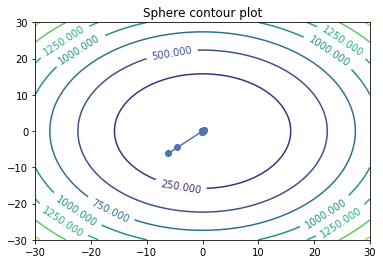

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pset.individuals import Sphere


def sphere(x, y):
    return (x**2) + (y ** 2)

RANGE = [-30, 30]

X, Y = np.linspace(*RANGE), np.linspace(*RANGE)
X, Y = np.meshgrid(X, Y)
Z = sphere(X, Y)

# Plot function
fix, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Sphere contour plot')

# Solve for 2d
sphere_simulation = run_es_mu_lambda(max_trials, precision, Sphere, 2, 5, 35, sp)
X = [i.chromosome[0] for i in sphere_simulation.best_over_time]
Y = [i.chromosome[0] for i in sphere_simulation.best_over_time]
ax.plot(X, Y, marker='o')
# plt.savefig('./assets/ex3-a-sphere.png', dpi=400)
plt.show()

## Contour plots (Ackley)

****************************************************************************************************
Starting (mu+lambda) simulation to solve Ackley with 2 dimensions
	Mu=5	Lambda=35
	Max trials=1000000
	Precision=0.001
	Search space=[-30, 30]
Simulation finished!
	Generations: 28
	Best:
		Fitness: 0.00034907972621356365
		Chromosome: 0.0000, -0.0001


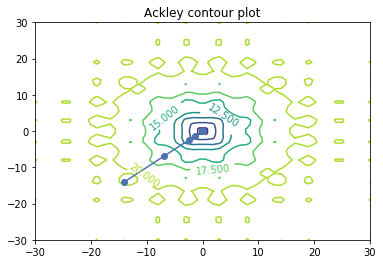

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

from pset.individuals import Ackley


def ackley(x, y):
    d = 2
    sum_1 = (x**2) + (y**2)
    sum_2 = (
        np.cos(2 * np.pi * x) +
        np.cos(2 * np.pi * y)
    )
    return (
        (-20 * np.exp(-0.2 * np.sqrt( sum_1 / d ))) -
        np.exp(sum_2 / d) +
        20 + np.exp(1)
    )

RANGE = [-30, 30]

X, Y = np.linspace(*RANGE), np.linspace(*RANGE)
X, Y = np.meshgrid(X, Y)
Z = ackley(X, Y)

# Plot function
fix, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Ackley contour plot')

# Solve for 2d
sphere_simulation = run_es_mu_lambda(max_trials, precision, Ackley, 2, 5, 35, sp)
X = [i.chromosome[0] for i in sphere_simulation.best_over_time]
Y = [i.chromosome[0] for i in sphere_simulation.best_over_time]
ax.plot(X, Y, marker='o')
# plt.savefig('./assets/ex3-a-ackley.png', dpi=400)
plt.show()

## Ex 3.b- ($\mu+\lambda$) vs (1+1)

In [71]:
run_es1p1_sphere(10, 10**3, 0.001, fifth_rule_enabled=True)
run_es_mu_lambda(10**6, 0.001, Sphere, 10, 5, 35, [-30, 30])

Starting simulation with d=10 (fifth rule enabled)
Objective reached
	Generations: 667
	Successful mutations: 146
	Chromosome mean: 0.0002929739209432219
	Fitness: 0.0008729120379531627
****************************************************************************************************
Starting (mu+lambda) simulation to solve Sphere with 10 dimensions
	Mu=5	Lambda=35
	Max trials=1000000
	Precision=0.001
	Search space=[-30, 30]
Simulation finished!
	Generations: 74
	Best:
		Fitness: 0.0008629828305260569
		Chromosome: 0.0035, 0.0067, -0.0063, -0.0060, 0.0139, -0.0154, -0.0063, 0.0032, -0.0032, -0.0154
